# Preparação dos dados

In [ ]:
# Importação das bibliotecas
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Leitura da base
df = pd.read_csv('/content/drive/MyDrive/IA/Machine Learning/focos.csv')

In [ ]:
df

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2010/01/01 15:40:00,AQUA_M-T,Brasil,SERGIPE,JAPOATA,Mata Atlantica,NaN,NaN,NaN,-10.34700,-36.77700,NaN
1,2010/01/01 15:41:00,AQUA_M-T,Brasil,PERNAMBUCO,PESQUEIRA,Caatinga,NaN,NaN,NaN,-8.44200,-36.68300,NaN
2,2010/01/01 15:41:00,AQUA_M-T,Brasil,SERGIPE,PORTO DA FOLHA,Caatinga,NaN,NaN,NaN,-9.86100,-37.53200,NaN
3,2010/01/01 15:41:00,AQUA_M-T,Brasil,PERNAMBUCO,PESQUEIRA,Caatinga,NaN,NaN,NaN,-8.44500,-36.66700,NaN
4,2010/01/01 17:14:00,AQUA_M-T,Brasil,SANTA CATARINA,SAO JOSE DO CERRITO,Mata Atlantica,NaN,NaN,NaN,-27.54200,-50.80200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2768221,2022/03/20 16:48:00,AQUA_M-T,Brasil,PARA,PARAGOMINAS,Amazonia,0.0,7.2,0.0,-3.17521,-47.89494,7.8
2768222,2022/03/20 16:43:00,AQUA_M-T,Brasil,MATO GROSSO,COCALINHO,Cerrado,0.0,0.5,0.0,-14.51014,-51.05017,25.7
2768223,2022/03/20 16:45:00,AQUA_M-T,Brasil,PIAUI,URUCUI,Cerrado,2.0,0.0,0.3,-8.01693,-44.39533,6.3
2768224,2022/03/20 16:41:00,AQUA_M-T,Brasil,RIO DE JANEIRO,TRAJANO DE MORAES,Mata Atlantica,5.0,0.9,0.8,-22.07493,-42.24797,13.4


## Tratamento

In [ ]:
df = df.drop(columns=['satelite', 'pais'])

> ## Observações
  * **satelite**: AQUA_M-T
  * **pais**: Brasil

### Formatação para datas

In [ ]:
# Descontrução de datahora
df['datahora'] = pd.to_datetime(df['datahora'])
df['ano'] = df['datahora'].dt.year
df['mes'] = df['datahora'].dt.month
df['dia'] = df['datahora'].dt.day
df['hora'] = df['datahora'].dt.hour
df['minuto'] = df['datahora'].dt.minute
del df['datahora']

# Ordenação
df = df[
    [
      'ano', 'mes', 'dia', 'hora', 'minuto', # Data/Hora
      'diasemchuva','precipitacao','riscofogo', 'frp', # Estimações
      'estado', 'municipio', 'bioma', 'latitude', 'longitude', # Localização
    ]
]

### Categorização

In [ ]:
df['estado'] = df['estado'].astype('category')
df['municipio'] = df['municipio'].astype('category')
df['bioma'] = df['bioma'].astype('category')

### Numéricos

In [ ]:
df['diasemchuva'] = pd.to_numeric(df['diasemchuva'])
df['precipitacao'] = pd.to_numeric(df['precipitacao'])
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])
df['frp'] = pd.to_numeric(df['frp'])

## Normalização

In [ ]:
df.drop(df[df['ano'].between(2010, 2013)].index, inplace=True) # Valores nulos

In [ ]:
df

,ano,mes,dia,hora,minuto,diasemchuva,precipitacao,riscofogo,frp,estado,municipio,bioma,latitude,longitude
822873,2014,1,1,17,37,3.0,1.9,0.2,NaN,AMAZONAS,AUTAZES,Amazonia,-3.45000,-59.07300
822874,2014,1,2,16,42,9.0,2.3,1.0,NaN,MARANHAO,GOVERNADOR NUNES FREIRE,Amazonia,-2.10700,-45.69000
822875,2014,1,2,16,42,0.0,0.0,0.2,NaN,PARA,PLACAS,Amazonia,-4.06400,-54.56500
822876,2014,1,2,16,42,3.0,0.0,0.0,NaN,PARA,BUJARU,Amazonia,-1.55800,-48.27800
822877,2014,1,2,16,42,0.0,0.0,0.1,NaN,PARA,CONCORDIA DO PARA,Amazonia,-1.99500,-48.00300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768221,2022,3,20,16,48,0.0,7.2,0.0,7.8,PARA,PARAGOMINAS,Amazonia,-3.17521,-47.89494
2768222,2022,3,20,16,43,0.0,0.5,0.0,25.7,MATO GROSSO,COCALINHO,Cerrado,-14.51014,-51.05017
2768223,2022,3,20,16,45,2.0,0.0,0.3,6.3,PIAUI,URUCUI,Cerrado,-8.01693,-44.39533
2768224,2022,3,20,16,41,5.0,0.9,0.8,13.4,RIO DE JANEIRO,TRAJANO DE MORAES,Mata Atlantica,-22.07493,-42.24797


In [ ]:
# Funções de boxplot
iqr = lambda series: series.quantile(.75) - series.quantile(.25) # IQR
lower_fence = lambda series: series.quantile(.25) - 1.5 * iqr(series)
upper_fence = lambda series: series.quantile(.75) + 1.5 * iqr(series)
# Padronizações estatisticas
zscore = lambda v, m, s: (v - m) / s
min_max = lambda v, minimun, maximun: (v - minimun) / (maximun - minimun)

### *One-Hot-Encoding*

In [ ]:
df['num_bioma'] = df['bioma'].cat.codes # Dummização do bioma

In [ ]:
df['num_estado'] = df['estado'].cat.codes # Dummização do estado

In [ ]:
df['num_municipio'] = df['municipio'].cat.codes # Dummização do municipio

### Imputação dos nulos

In [ ]:
df.isnull().sum()

ano                   0
mes                   0
dia                   0
hora                  0
minuto                0
diasemchuva       14531
precipitacao      14531
riscofogo         14531
frp              789677
estado                0
municipio             0
bioma                 0
latitude              0
longitude             0
num_bioma             0
num_estado            0
num_municipio         0
dtype: int64

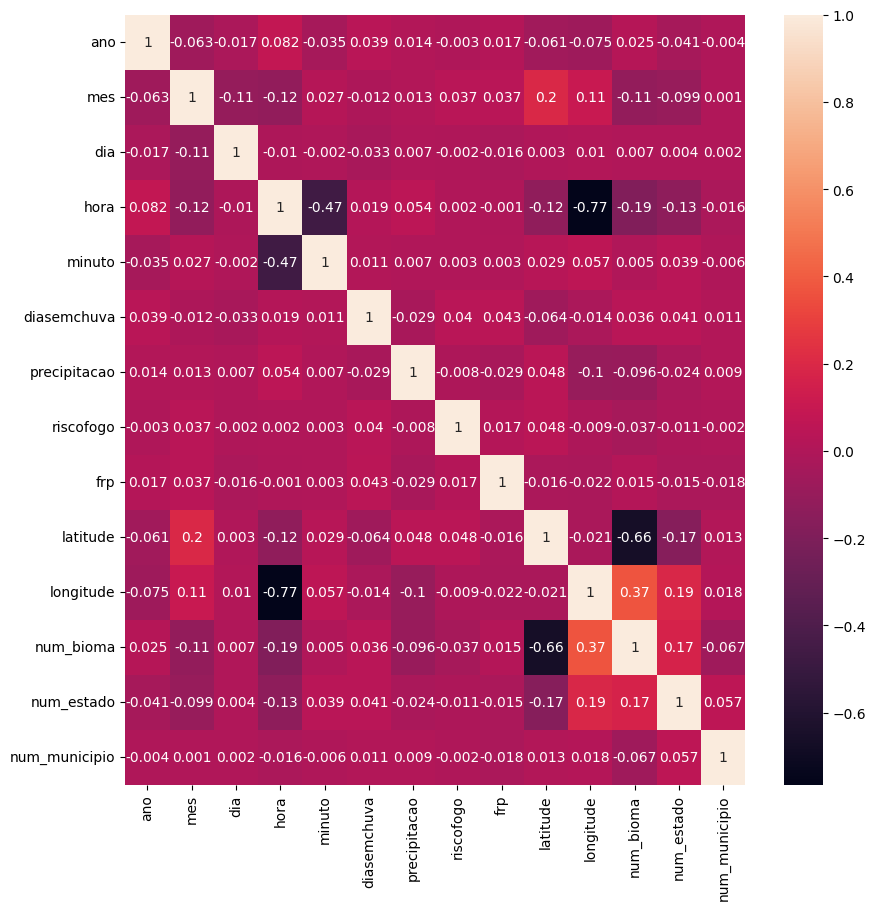

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True).round(3), annot=True);

In [ ]:
gdsc = ['frp', 'num_estado', 'ano', 'num_bioma', 'riscofogo']
df.groupby(gdsc)['diasemchuva'].transform('mean').round().isnull().sum()

804208

In [ ]:
# Missing values > Media por grupo (diasemchuva)
gdsc = ['frp', 'num_estado', 'ano', 'num_bioma']
mean_dsc = df.groupby(gdsc)['diasemchuva'].transform('mean').round()
df['diasemchuva_norm'] = df['diasemchuva'].fillna(mean_dsc)
df['diasemchuva_norm'] = df['diasemchuva'].fillna(mean_dsc.mean().round())

# Limite inferior (diasemchuva)
df['diasemchuva_norm'] = df['diasemchuva_norm'].apply(lambda x: 0 if x < 0 else x)

# Limite superior (diasemchuva)
out_dsc = upper_fence(df['diasemchuva_norm'])
df['diasemchuva_norm'] = df['diasemchuva_norm'].apply(lambda x: out_dsc if x > out_dsc else x)

In [ ]:
# Missing values > Moda por grupo (precipitacao)
mode_prec = df.groupby('hora')['precipitacao'].transform(pd.Series.mode)
df['precipitacao_norm'] = df['precipitacao'].fillna(mode_prec)

# Limite para True ou False (precipitacao)
df['precipitacao_norm'] = df['precipitacao_norm'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# Missing values > Mediana por grupo (frp)
gfrp = ['diasemchuva', 'mes', 'riscofogo']
median_frp = df.groupby(gfrp)['frp'].transform('median')
df['frp_norm'] = df['frp'].fillna(median_frp)
df['frp_norm'] = df['frp_norm'].fillna(median_frp.median())

# Limite inferior (frp)
low_frp = lower_fence(df['frp_norm'])
df['frp_norm'] = df['frp_norm'].apply(lambda x: low_frp if x < low_frp else x)

# Limite superior (frp)
out_frp = upper_fence(df['frp_norm'])
df['frp_norm'] = df['frp_norm'].apply(lambda x: out_frp if x > out_frp else x)

In [ ]:
# # Padronização 0-1
# df['diasemchuva_norm'] = df['diasemchuva_norm'].apply(lambda x: min_max(x, 0, 90))
# df['precipitacao_norm'] = df['precipitacao_norm'].apply(lambda x: min_max(x, 0, 1))
# df['frp_norm'] = df['frp_norm'].apply(lambda x: min_max(x, 0, 100))

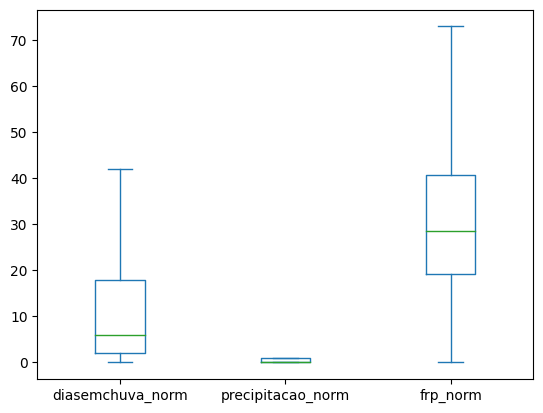

In [ ]:
df[['diasemchuva_norm', 'precipitacao_norm', 'frp_norm']].plot(kind='box');

In [ ]:
df = df.drop(['diasemchuva', 'precipitacao', 'frp'], axis=1)
del df['bioma']
del df['estado']
del df['municipio']

In [ ]:
from scipy import stats
for i in df.columns:
  p = stats.shapiro(df[i])
  print(p);

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9300875067710876, pvalue=0.0)
ShapiroResult(statistic=0.8900588154792786, pvalue=0.0)
ShapiroResult(statistic=0.9562854170799255, pvalue=0.0)
ShapiroResult(statistic=0.8002184629440308, pvalue=0.0)
ShapiroResult(statistic=0.9626389145851135, pvalue=0.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=0.9616441130638123, pvalue=0.0)
ShapiroResult(statistic=0.9760845899581909, pvalue=0.0)
ShapiroResult(statistic=0.7875710725784302, pvalue=0.0)
ShapiroResult(statistic=0.9401930570602417, pvalue=0.0)
ShapiroResult(statistic=0.9538963437080383, pvalue=0.0)
ShapiroResult(statistic=0.7612820267677307, pvalue=0.0)
ShapiroResult(statistic=0.5461105108261108, pvalue=0.0)
ShapiroResult(statistic=0.8880754113197327, pvalue=0.0)


## Alvo

In [ ]:
df['alvo'] = df['riscofogo'].apply(lambda x: 1 if x >= 1 else 0)
df['alvo'] = pd.to_numeric(df['alvo'], downcast='signed')

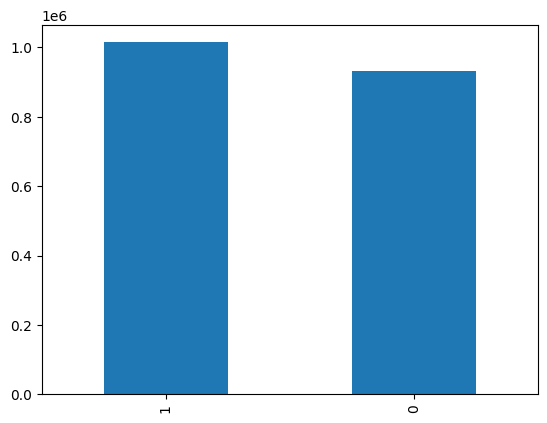

In [ ]:
df['alvo'].value_counts().plot(kind='bar');

In [ ]:
df = df[
    [
      'ano', 'mes', 'dia', 'hora', 'minuto', # Data
      'diasemchuva_norm', 'precipitacao_norm', 'frp_norm', # Clima
      'num_bioma', # Bioma
      'num_estado', 'latitude', 'longitude', # Local
      'riscofogo', 'alvo'
    ]
]

In [ ]:
df

,ano,mes,dia,hora,minuto,diasemchuva_norm,precipitacao_norm,frp_norm,num_bioma,num_estado,latitude,longitude,riscofogo,alvo
822873,2014,1,1,17,37,3.0,1,19.8,0,3,-3.45000,-59.07300,0.2,0
822874,2014,1,2,16,42,9.0,1,20.2,0,9,-2.10700,-45.69000,1.0,1
822875,2014,1,2,16,42,0.0,0,17.9,0,13,-4.06400,-54.56500,0.2,0
822876,2014,1,2,16,42,3.0,0,16.9,0,13,-1.55800,-48.27800,0.0,0
822877,2014,1,2,16,42,0.0,0,17.4,0,13,-1.99500,-48.00300,0.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768221,2022,3,20,16,48,0.0,1,7.8,0,13,-3.17521,-47.89494,0.0,0
2768222,2022,3,20,16,43,0.0,1,25.7,2,10,-14.51014,-51.05017,0.0,0
2768223,2022,3,20,16,45,2.0,0,6.3,2,17,-8.01693,-44.39533,0.3,0
2768224,2022,3,20,16,41,5.0,1,13.4,3,18,-22.07493,-42.24797,0.8,0


## Desbalanceamento (SMOTE)

In [ ]:
df = df.drop('riscofogo', axis=1)

In [ ]:
from imblearn.over_sampling import SMOTE

X_train, y_test = df.drop('alvo', axis=1), df['alvo']

smote = SMOTE()

X_train, y_test = smote.fit_resample(X_train, y_test)

In [ ]:
X_train['alvo'] = y_test
df = X_train
df

,ano,mes,dia,hora,minuto,diasemchuva_norm,precipitacao_norm,frp_norm,num_bioma,num_estado,latitude,longitude,alvo
0,2014,1,1,17,37,3.0,1,19.800000,0,3,-3.450000,-59.073000,0
1,2014,1,2,16,42,9.0,1,20.200000,0,9,-2.107000,-45.690000,1
2,2014,1,2,16,42,0.0,0,17.900000,0,13,-4.064000,-54.565000,0
3,2014,1,2,16,42,3.0,0,16.900000,0,13,-1.558000,-48.278000,0
4,2014,1,2,16,42,0.0,0,17.400000,0,13,-1.995000,-48.003000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028617,2020,8,24,16,29,42.0,0,44.315201,2,7,-16.711070,-48.952336,0
2028618,2015,10,16,17,4,10.0,0,45.400000,2,26,-10.880039,-48.865627,0
2028619,2015,10,14,17,16,0.0,0,25.450000,0,10,-10.421714,-53.897300,0
2028620,2016,10,11,16,57,0.0,0,27.692790,2,26,-12.450675,-47.868081,0


## Seleção
As variáveis **latitude** e **longitude** são retiradas na seleção.
* Importantes na localização

In [ ]:
from sklearn.model_selection import train_test_split
data = df.iloc[:, :-1]
alvo = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  data, alvo, test_size = 0.3, stratify = alvo
)

### RFE (Recursive Feature Elimination)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=1000)
selected = RFE(
  model, step=1,
  n_features_to_select = round(len(df.columns) // 2)
  ).fit(X_train.drop(columns=['latitude', 'longitude']), y_train)

_columns = [X_train.columns[i] for i, c in enumerate(selected.support_) if c]
_columns

_X_train, _X_test = X_train[_columns], X_test[_columns]
_X_train

,mes,hora,diasemchuva_norm,precipitacao_norm,num_bioma,num_estado
1627749,8,18,19.0,0,0,21
1269220,10,17,0.0,0,0,10
1365095,7,18,1.0,1,0,3
717344,10,16,0.0,0,0,13
415115,6,17,9.0,0,3,15
...,...,...,...,...,...,...
450483,8,17,4.0,0,4,20
348781,11,17,2.0,1,0,13
675128,9,16,0.0,0,2,9
116270,10,16,5.0,1,0,13


### SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
selected = SelectKBest(
    chi2,
    k = round(len(data.columns) // 2)
    ).fit(X_train.drop(columns=['latitude', 'longitude']), y_train)

_X_train, _X_test = X_train[
  selected.get_feature_names_out()
], X_test[
  selected.get_feature_names_out()
]
_X_train

,minuto,diasemchuva_norm,precipitacao_norm,frp_norm,num_bioma,num_estado
1627749,19,19.0,0,73.05,0,21
1269220,25,0.0,0,48.50,0,10
1365095,20,1.0,1,7.30,0,3
717344,36,0.0,0,25.45,0,13
415115,31,9.0,0,17.65,3,15
...,...,...,...,...,...,...
450483,23,4.0,0,21.35,4,20
348781,6,2.0,1,21.50,0,13
675128,15,0.0,0,32.80,2,9
116270,42,5.0,1,31.60,0,13


## Finalização / Exportação

In [ ]:
df['ano'] = df['ano'].astype('uint16')
df['mes'] = df['mes'].astype('uint8')
df['dia'] = df['dia'].astype('uint8')
df['hora'] = df['hora'].astype('uint8')
df['minuto'] = df['minuto'].astype('uint8')

In [ ]:
df['diasemchuva_norm'] = pd.to_numeric(df['diasemchuva_norm'])
df['precipitacao_norm'] = pd.to_numeric(df['precipitacao_norm'])
df['precipitacao_norm'] = df['precipitacao_norm'].round()
df['frp_norm'] = pd.to_numeric(df['frp_norm'])

In [ ]:
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])

df['num_bioma'] = pd.to_numeric(df['num_bioma'])
df['alvo'] = pd.to_numeric(df['alvo'])

In [ ]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028622 entries, 0 to 2028621
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ano                uint16 
 1   mes                uint8  
 2   dia                uint8  
 3   hora               uint8  
 4   minuto             uint8  
 5   diasemchuva_norm   float64
 6   precipitacao_norm  int64  
 7   frp_norm           float64
 8   num_bioma          int8   
 9   num_estado         int8   
 10  latitude           float64
 11  longitude          float64
 12  alvo               int8   
dtypes: float64(4), int64(1), int8(3), uint16(1), uint8(4)
memory usage: 94.8 MB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  df, alvo, test_size = 0.3, stratify = alvo
)

In [ ]:
X_train

,ano,mes,dia,hora,minuto,diasemchuva_norm,precipitacao_norm,frp_norm,num_bioma,num_estado,latitude,longitude,alvo
628990,2017,8,19,17,47,0.0,1,19.00,0,10,-9.340,-60.494,0
474768,2016,9,8,17,54,5.0,0,26.95,0,3,-9.099,-67.465,0
75608,2014,9,4,16,59,9.0,0,41.10,0,26,-6.533,-48.029,1
1086795,2019,10,31,16,40,9.0,0,73.05,1,17,-6.226,-41.162,1
1203946,2020,9,10,16,20,0.0,0,20.50,0,9,-2.844,-44.070,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
733077,2017,10,7,16,52,0.0,1,31.30,0,13,-8.511,-49.567,0
982892,2019,8,15,17,5,14.0,0,73.05,2,10,-15.394,-53.887,1
697875,2017,9,28,16,58,0.0,0,32.80,2,9,-7.480,-47.055,1
1313569,2020,1,14,16,20,8.0,0,73.05,3,25,-10.730,-37.091,1


In [ ]:
X_test

,ano,mes,dia,hora,minuto,diasemchuva_norm,precipitacao_norm,frp_norm,num_bioma,num_estado,latitude,longitude,alvo
1446045,2020,9,10,18,0,5.0,1,11.9,0,3,-7.60400,-64.56300,0
1756892,2022,6,16,17,20,2.0,0,14.5,3,15,-26.59944,-51.33309,0
912152,2018,6,5,15,55,27.0,0,8.2,3,1,-9.52200,-36.01100,1
1704370,2021,9,29,18,0,3.0,1,12.7,0,0,-8.53786,-70.61274,0
303008,2015,9,11,16,33,10.0,0,41.1,2,4,-11.37200,-43.60600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840055,2022,9,5,17,49,7.0,0,12.6,0,21,-8.75692,-62.84147,0
1016015,2019,9,7,17,15,10.0,0,18.8,2,10,-15.54500,-53.08300,1
379485,2015,12,15,17,28,0.0,1,20.9,0,10,-12.08700,-57.44900,0
1326994,2020,5,23,16,10,5.0,0,21.3,2,9,-5.89500,-43.48000,0


In [ ]:
X_train.to_csv('/content/drive/MyDrive/IA/Machine Learning/_focos_treino.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/IA/Machine Learning/_focos_teste.csv', index=False)